In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error,f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input,Dense,Dropout

In [ ]:
data = pd.read_excel('SCFP2009panel.xlsx')

In [ ]:
data.shape

(19285, 515)

In [ ]:
data['riskless_07'] = data['LIQ07']+data['CDS07']+data['SAVBND07']+data['CASHLI07']
data['risky07'] = data['NMMF07']+data['STOCKS07']+data['BOND07']
data['riskless_09'] = data['LIQ09'] + data['CDS09'] + data['SAVBND09'] + data['CASHLI09']
data['risky09'] = data['NMMF09'] + data['STOCKS09'] + data['BOND09']

In [ ]:
data['risk_tolerence07'] = data['risky07']/(data['risky07']+data['riskless_07'])

Average_SI_2007=1478
Average_SI_2009=948

data['risk_tolerence09'] = (data['risky09']/(data['risky09']+data['riskless_09']))*(Average_SI_2009/Average_SI_2007)

In [ ]:
data.head()

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I,riskless_07,risky07,riskless_09,risky09,risk_tolerence07,risk_tolerence09
0,1,11,11668.134198,47,3,12,2,1,0,2,...,0.0,93.125197,270.403054,57,7994.813847,0.0,16000,17000,0.0,0.330422
1,1,12,11823.456494,47,3,12,2,1,0,2,...,0.0,93.125197,249.593620,57,7994.813847,0.0,19000,18000,0.0,0.312036
2,1,13,11913.228354,47,3,12,2,1,0,2,...,0.0,93.125197,209.233358,57,7984.457871,0.0,13000,12000,0.0,0.307876
3,1,14,11929.394266,47,3,12,2,1,0,2,...,0.0,93.125197,209.273158,57,7984.457871,0.0,25000,13000,0.0,0.219429
4,1,15,11917.722907,47,3,12,2,1,0,2,...,0.0,93.125197,232.690767,57,7994.813847,0.0,17000,12000,0.0,0.265410


In [ ]:
data['percentage_change'] = np.abs(data['risk_tolerence09']/data['risk_tolerence07']-1)
data = data.dropna(axis=0)
data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

C:\Users\sivar\anaconda3\envs\ANN\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='risk_tolerence07'>

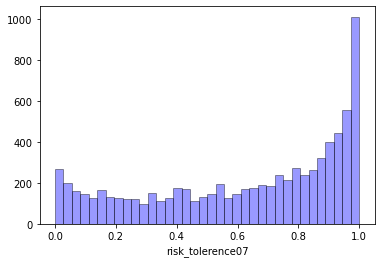

In [ ]:
sns.distplot(data['risk_tolerence07'], hist=True, kde=False,
bins=int(180/5), color = 'blue',
hist_kws={'edgecolor':'black'})

<AxesSubplot:xlabel='risk_tolerence09'>

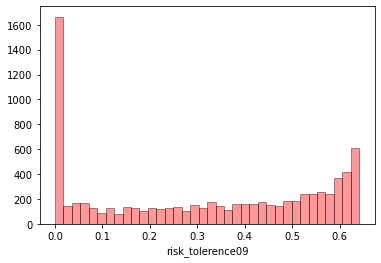

In [ ]:
sns.distplot(data['risk_tolerence09'], hist=True, kde=False,
bins=int(180/5), color = 'red',
hist_kws={'edgecolor':'black'})

In [ ]:
dataset = pd.DataFrame(data[data['percentage_change']<=.1])
dataset['TrueRiskTolerance'] = (dataset['risk_tolerence07'] + dataset['risk_tolerence09'])/2

In [ ]:

dataset.index =np.arange(1,len(dataset)+1)
dataset

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,LEVERAGEPCT,I,riskless_07,risky07,riskless_09,risky09,risk_tolerence07,risk_tolerence09,percentage_change,TrueRiskTolerance
1,14,141,13732.681713,77,6,12,2,1,0,6,...,-35.900702,57,1.170225e+04,2.899673e+03,11000,5000,0.198582,0.200440,0.009357,0.199511
2,95,951,43.840398,55,4,17,4,1,1,5,...,-54.021909,57,1.102911e+06,2.226535e+06,1354500,30550000,0.668740,0.614176,0.081592,0.641458
3,253,2533,297.850586,85,6,17,4,1,0,5,...,0.000000,57,2.148865e+06,3.075725e+06,70000,824000,0.588702,0.591185,0.004219,0.589943
4,270,2701,7184.506057,40,2,12,2,1,3,3,...,-100.000000,57,2.122975e+03,1.656956e+03,12300,25000,0.438356,0.429898,0.019296,0.434127
5,279,2794,4340.608277,70,5,12,2,1,0,5,...,-53.466186,57,1.788477e+05,5.488668e+04,331500,175000,0.234825,0.221612,0.056269,0.228218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,4402,44021,5873.843391,53,3,16,4,1,0,2,...,13.545972,57,2.278315e+04,1.242717e+04,19000,23000,0.352941,0.351247,0.004801,0.352094
352,4402,44022,5939.807789,53,3,16,4,1,0,2,...,-9.418465,57,2.174755e+04,1.242717e+04,19000,23000,0.363636,0.351247,0.034071,0.357442
353,4402,44023,5970.026444,53,3,16,4,1,0,2,...,-18.158422,57,2.278315e+04,1.242717e+04,19000,23000,0.352941,0.351247,0.004801,0.352094
354,4402,44024,5993.081847,53,3,16,4,1,0,2,...,-21.165892,57,2.278315e+04,1.242717e+04,19000,23000,0.352941,0.351247,0.004801,0.352094


In [ ]:
imp_list = ['AGE07','EDCL07','MARRIED07','KIDS07','OCCAT107','INCOME07','RISK07','NETWORTH07','TrueRiskTolerance']
drop_list = [col for col in dataset.columns if col not in imp_list]
dataset.drop(labels=drop_list,axis=1,inplace=True)

In [ ]:
print(dataset)

     AGE07  EDCL07  MARRIED07  KIDS07  OCCAT107      INCOME07  RISK07  \
1       77       2          1       0         3  3.141680e+04       4   
2       55       4          1       1         2  2.779588e+06       2   
3       85       4          1       0         2  3.727417e+05       4   
4       40       2          1       3         1  5.324882e+04       3   
5       70       2          1       0         2  3.716767e+04       3   
..     ...     ...        ...     ...       ...           ...     ...   
351     53       4          1       0         1  1.810460e+05       2   
352     53       4          1       0         1  1.821109e+05       2   
353     53       4          1       0         1  1.810460e+05       2   
354     53       4          1       0         1  1.810460e+05       2   
355     53       4          1       0         1  1.821109e+05       2   

       NETWORTH07  TrueRiskTolerance  
1    2.152490e+05           0.199511  
2    4.964759e+07           0.641458  
3    5

<AxesSubplot:title={'center':'Correlation Matrix'}>

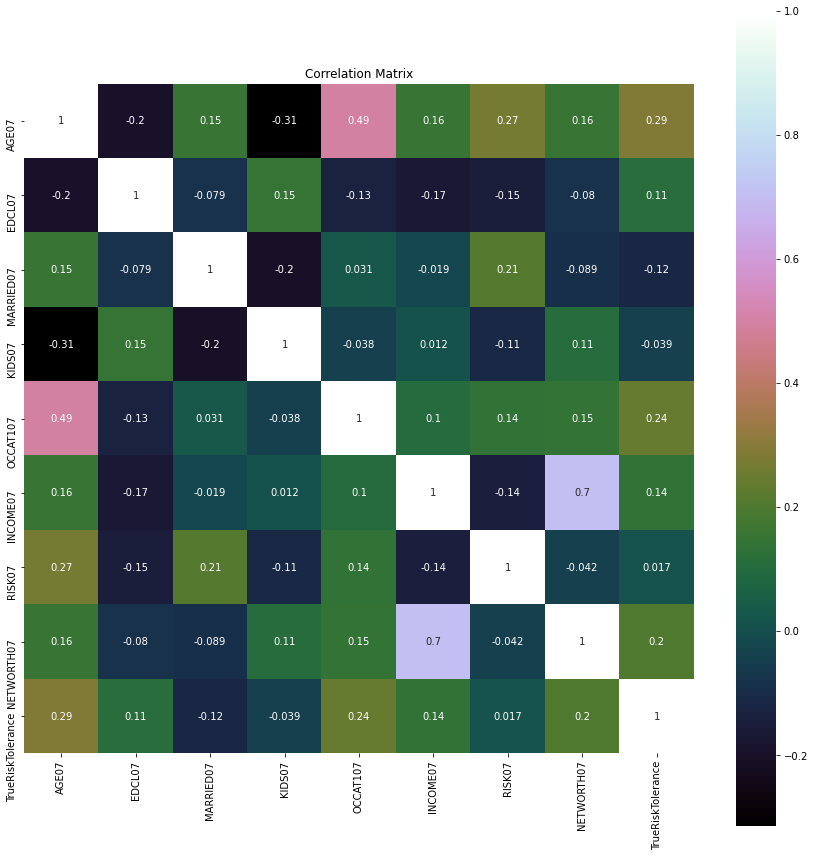

In [ ]:
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [ ]:
y = dataset['TrueRiskTolerance']
x = dataset.drop('TrueRiskTolerance',axis=1)
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2,random_state=5)
y_test

182    0.660660
109    0.531733
294    0.613872
61     0.141236
350    0.076191
         ...   
142    0.007258
326    0.544304
141    0.007654
264    0.277928
19     0.595579
Name: TrueRiskTolerance, Length: 71, dtype: float64

In [ ]:
all_models = []
all_models.append(('LR',LinearRegression()))
all_models.append(('KNN',KNeighborsRegressor()))
all_models.append(('DTR', DecisionTreeRegressor()))
all_models.append(('SVR', SVR()))
all_models.append(('ABR', AdaBoostRegressor()))
all_models.append(('GBR', GradientBoostingRegressor()))
all_models.append(('RFR', RandomForestRegressor()))
all_models.append(('ETR', ExtraTreesRegressor()))
#all_models.append(('MLP',MLPRegressor))

In [ ]:
names = []
kfold_results = []
test_results = []
train_results = []
for i, model in all_models:
    names.append(i)
    #print(model,i)
    kfold = KFold(n_splits=10,random_state=3,shuffle=True)
    cv_results = -(cross_val_score(model, x_train, y_train, cv=kfold,scoring='r2'))
    kfold_results.append(cv_results)
    res = model.fit(x_train, y_train)
    train_result = mean_squared_error(res.predict(x_train), y_train)
    train_results.append(train_result)
    test_result = mean_squared_error(res.predict(x_test), y_test)
    test_results.append(test_result)

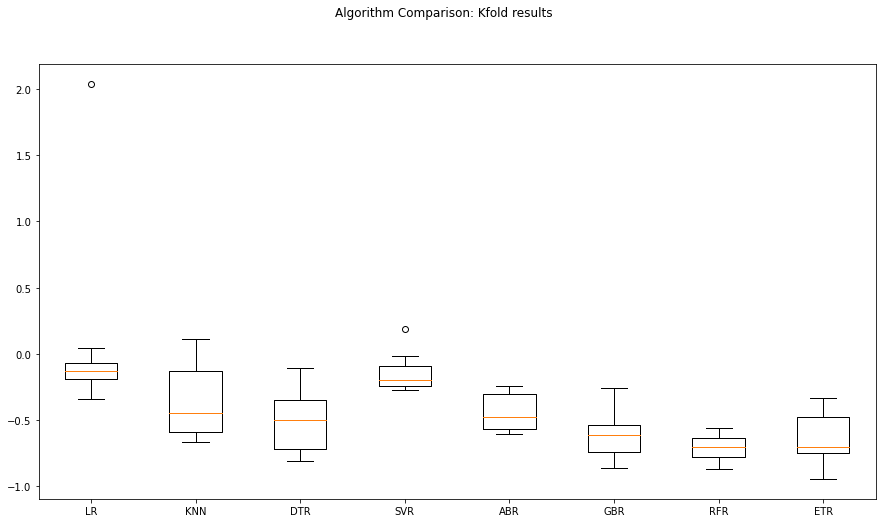

In [ ]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

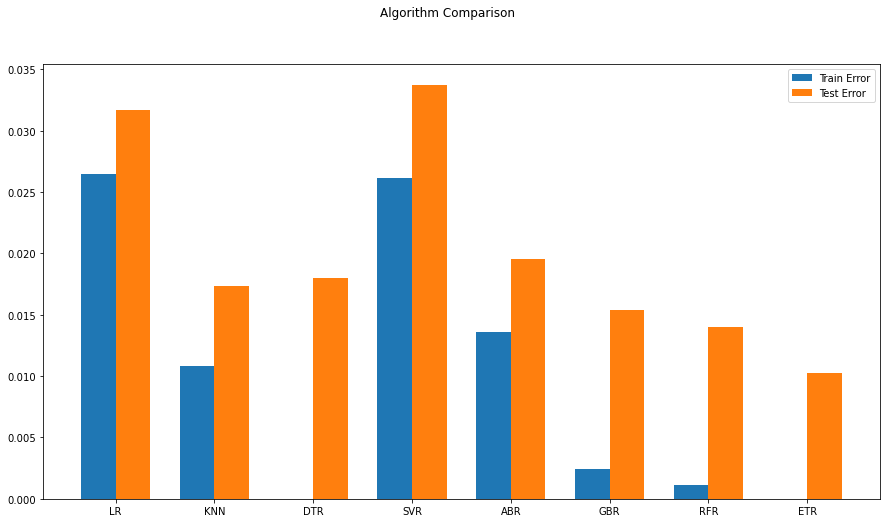

In [ ]:
fig = pyplot.figure()
ind = np.arange(len(names))
width = 0.35
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results, width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=8, kernel_initializer='normal', activation='relu'))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(4, activation='relu'))
nn_model.add(Dense(1, activation='linear'))
nn_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_34 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 5         
Total params: 1,689
Trainable params: 1,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn_model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=nn_model.fit(x_train, y_train, epochs=100, verbose=1)
predictions = nn_model.predict(x_test)
predictions

Epoch 1/100
9/9 [==============================] - 0s 997us/step - loss: 402040651776.0000 - mse: 402040651776.0000 - mae: 166907.6406
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 22525319168.0000 - mse: 22525319168.0000 - mae: 39209.1680
Epoch 3/100
9/9 [==============================] - 0s 997us/step - loss: 14123472896.0000 - mse: 14123472896.0000 - mae: 17780.4297
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 1200389.1250 - mse: 1200389.1250 - mae: 73.5691
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 468543.4375 - mse: 468543.4375 - mae: 46.4997
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 55323.5664 - mse: 55323.5664 - mae: 18.1096
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 6241.8091 - mse: 6241.8091 - mae: 7.6584
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 236.2882 - mse: 236.2882 - mae: 2.3700
Epoch 9/100
9/9 [=============

Epoch 74/100
9/9 [==============================] - 0s 1ms/step - loss: 597.0605 - mse: 597.0605 - mae: 2.3553
Epoch 75/100
9/9 [==============================] - 0s 1ms/step - loss: 144.1839 - mse: 144.1839 - mae: 1.5460
Epoch 76/100
9/9 [==============================] - 0s 1ms/step - loss: 12.4854 - mse: 12.4854 - mae: 0.8268
Epoch 77/100
9/9 [==============================] - 0s 1ms/step - loss: 4.5266 - mse: 4.5266 - mae: 0.6633
Epoch 78/100
9/9 [==============================] - 0s 1ms/step - loss: 10.7251 - mse: 10.7251 - mae: 0.7795
Epoch 79/100
9/9 [==============================] - 0s 1ms/step - loss: 28.8566 - mse: 28.8566 - mae: 0.9553
Epoch 80/100
9/9 [==============================] - 0s 1ms/step - loss: 10.0293 - mse: 10.0293 - mae: 0.7673
Epoch 81/100
9/9 [==============================] - 0s 1ms/step - loss: 20.6748 - mse: 20.6748 - mae: 0.8798
Epoch 82/100
9/9 [==============================] - 0s 1ms/step - loss: 91.3162 - mse: 91.3162 - mae: 1.1640
Epoch 83/100
9/9 

array([[-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0.00977434],
       [-0

In [ ]:
y

1      0.199511
2      0.641458
3      0.589943
4      0.434127
5      0.228218
         ...   
351    0.352094
352    0.357442
353    0.352094
354    0.352094
355    0.352094
Name: TrueRiskTolerance, Length: 355, dtype: float64